In [1]:
!pip install astsadata statsmodels --upgrade

     |████████████████████████████████| 481kB 4.0MB/s 
     |████████████████████████████████| 9.5MB 24.2MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import rpy2.robjects as robjects
from statsmodels.formula.api import ols
from astsadata import *

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/datetimes.py:1092: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


# 2.3 Smoothing in the Time Series Context

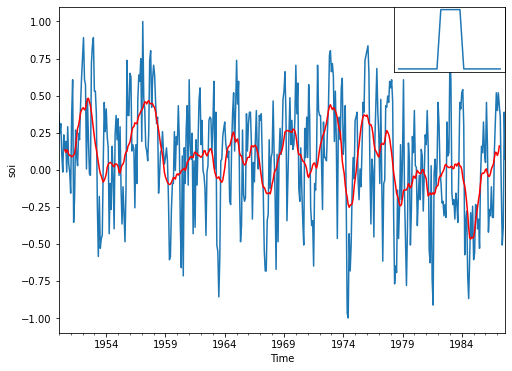

In [3]:
# Example 2.11
wgts = np.array([.5, *np.repeat(1, 11), .5])/12
soif = sm.tsa.filters.convolution_filter(soi.values.ravel(), filt=wgts, nsides=2)

fig, axes = plt.subplots(figsize=(8, 6))
soi.plot(ax=axes, xlabel="Time", ylabel="soi", legend=False)
plt.plot(soi.index, soif, color="red")

nwgts = np.array([*np.repeat(0, 21), *wgts, *np.repeat(0, 20)])

axin = axes.inset_axes([.75, .8, .25, .2])
axin.get_xaxis().set_ticks([])
axin.get_yaxis().set_ticks([])
axin.plot(nwgts)
plt.show()

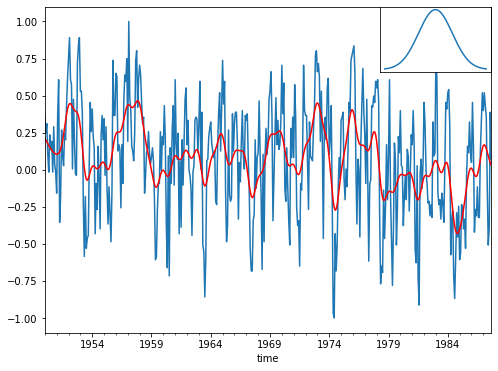

In [4]:
# Example 2.12
time = [idx.ordinal for idx in soi.index]
fit = sm.nonparametric.KernelReg(soi.values.ravel(), time, "c", "lc", [4]).fit(time)

fig, axes = plt.subplots(figsize=(8, 6))
soi.plot(ax=axes, legend=False, xlabel="time")
plt.plot(soi.index, fit[0], color="red")

# Working on inset picture of Gaussian density
x = np.arange(-3, 3.001, .001)
gauss = 1/np.sqrt(2 * np.pi) * np.exp(-(x**2)/2)

axin = axes.inset_axes([.75, .8, .25, .2])
axin.get_xaxis().set_ticks([])
axin.get_yaxis().set_ticks([])
axin.plot(gauss)
plt.show()
plt.show()

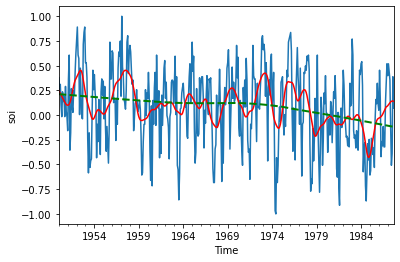

In [5]:
# Example 2.13
time = [idx.ordinal for idx in soi.index]
lowess_1 = sm.nonparametric.lowess(soi.values.ravel(), time, frac=.05)[:, 1]
lowess_2 = sm.nonparametric.lowess(soi.values.ravel(), time)[:, 1]

soi.plot(legend=False, xlabel="Time", ylabel="soi")
plt.plot(soi.index, lowess_1, color="red")
plt.plot(soi.index, lowess_2, color="green", linestyle="--", linewidth=2)
plt.show()

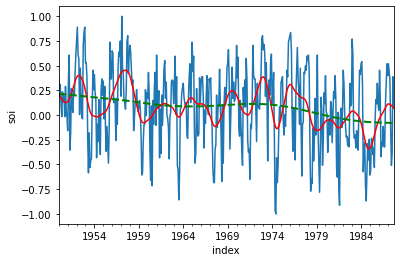

In [6]:
# Example 2.14
r_x = robjects.FloatVector([idx.ordinal for idx in soi.index])
r_y = robjects.FloatVector(soi.values.ravel())

r_smooth_spline = robjects.r['smooth.spline'] # extract R function

spline_1 = r_smooth_spline(x=r_x, y=r_y, spar=.5) # run smoothing function
spline_1_y = pd.Series(np.array(spline_1.rx2("y")), index=soi.index)

spline_2 = r_smooth_spline(x=r_x, y=r_y, spar=1)
spline_2_y = pd.Series(np.array(spline_2.rx2("y")), index=soi.index)

soi.plot(legend=False, xlabel="Time", ylabel="soi")
spline_1_y.plot(color="red")
spline_2_y.plot(color="green", linestyle="--", linewidth=2)
plt.show()

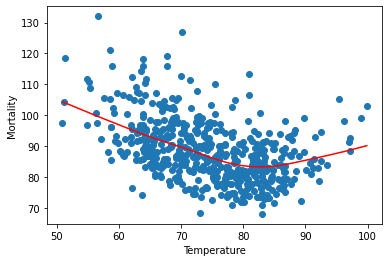

In [7]:
# Example 2.15
lowess = sm.nonparametric.lowess(cmort.values.ravel(), tempr.values.ravel())

plt.scatter(tempr, cmort)
plt.plot(lowess[:, 0], lowess[:, 1], color="red")
plt.xlabel("Temperature")
plt.ylabel("Mortality")
plt.show()